In [1]:
# Dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr


In [2]:
# Load CSV into DF

file_path = 'Resources/Forested_Areas.csv'
forest_df = pd.read_csv(file_path, encoding='utf-8')

forest_df.head()

,Country,Forested Area (%),Life Expectancy (years)
0,Suriname,98.3,71.6
1,Federated States of Micronesia,91.9,67.8
2,Gabon,90.0,66.2
3,Seychelles,88.4,72.8
4,Palau,87.6,69.1


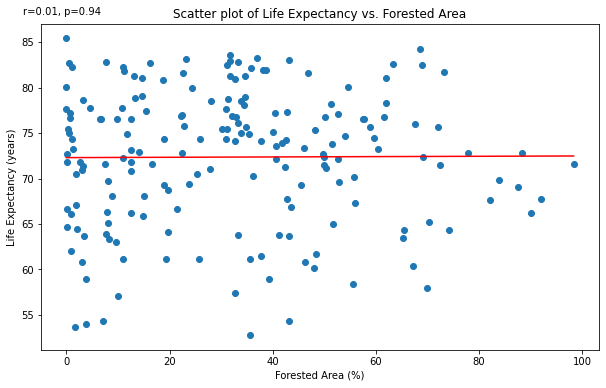

In [3]:
# Determine plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(forest_df["Forested Area (%)"], forest_df["Life Expectancy (years)"])

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(forest_df["Forested Area (%)"], forest_df["Life Expectancy (years)"])

# Plot the regression line
plt.plot(forest_df["Forested Area (%)"], intercept + slope * forest_df["Forested Area (%)"], color='red')

# Calculate and annotate the correlation coefficient and p-value
r, p = pearsonr(forest_df["Forested Area (%)"], forest_df["Life Expectancy (years)"])
plt.annotate(f'r={r:.2f}, p={p:.2f}', xy=(0.1, 0.9), xycoords=plt.gcf().transFigure)

# Label Chart
plt.xlabel('Forested Area (%)')
plt.ylabel('Life Expectancy (years)')
plt.title('Scatter plot of Life Expectancy vs. Forested Area')
plt.show()

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import numpy as np

# Define X and y
X = forest_df["Forested Area (%)"].values.reshape(-1, 1)
y = forest_df["Life Expectancy (years)"]

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate the R-squared value
r2 = r2_score(y, model.predict(X))
print(f'R-squared value: {r2:.2f}')

# Calculate the p-value
r, p = pearsonr(forest_df["Forested Area (%)"], forest_df["Life Expectancy (years)"])
print(f'Correlation coefficient (r): {r:.2f}')
print(f'p-value: {p:.2f}')

# Generate a range of x values for the regression line
x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

# Create an interactive scatter plot
fig = px.scatter(forest_df, x="Forested Area (%)", y="Life Expectancy (years)", custom_data=['Country'], hover_data=['Country'], title='Scatter plot of Life Expectancy vs. Forested Area')

# Add the regression line to the plot
fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines', name='Regression Line'))

# Show the plot
fig.show()

R-squared value: 0.00
Correlation coefficient (r): 0.01
p-value: 0.94
